In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)


C:\Anaconda\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


TensorFlow Version: 2.20.0


In [3]:
!pip install opencv-python

   ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/40.2 MB 991.0 kB/s eta 0:00:41
   ---------------------------------------- 0.1/40.2 MB 1.1 MB/s eta 0:00:39
   ---------------------------------------- 0.2/40.2 MB 1.1 MB/s eta 0:00:35
   ---------------------------------------- 0.2/40.2 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.3/40.2 MB 1.2 MB/s eta 0:00:35
   ---------------------------------------- 0.3/40.2 MB 1.2 MB/s eta 0:00:33
   ---------------------------------------- 0.4/40.2 MB 1.2 MB/s eta 0:00:34
   ---------------------------------------- 0.5/40.2 MB 1.2 MB/s eta 0:00:33
    --------------------------------------- 0.6/40.2 MB 1.4 MB/s eta 0:00:30
    --------------------------------------- 0.6/40.2 MB 1.3 MB/s eta 0:00:32
    --------------------------------------- 0.6/40.2 MB 1.3 MB/s eta 0:00:32
    -------

  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.4.1 which is incompatible.
numba 0.59.1 requires numpy<1.27,>=1.22, but you have numpy 2.4.1 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.4.1 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.4.1 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.4.1 which is incompatible.
streamlit 1.32.0 requires protobuf<5,>=3.20, but you have protobuf 6.33.2 which is incompatible.


In [4]:
!pip install matplotlib


  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.4.1
    Uninstalling numpy-2.4.1:
      Successfully uninstalled numpy-2.4.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.13.0.90 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
streamlit 1.32.0 requires protobuf<5,>=3.20, but you have protobuf 6.33.2 which is incompatible.


In [5]:
!pip install scikit-learn

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report, confusion_matrix

C:\Anaconda\Lib\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


In [3]:
train_path = "dataset/TRAIN"
test_path = "dataset/TEST"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary'
)

test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(224,224),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


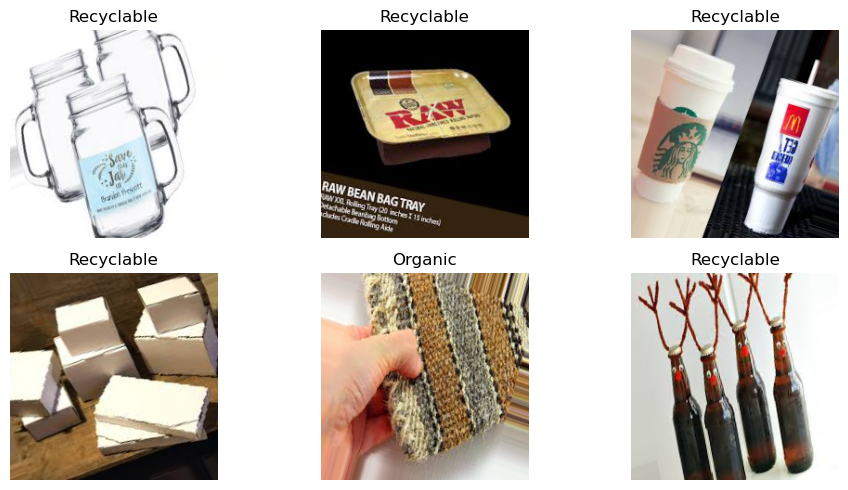

In [5]:
imgs, labels = next(train_data)

plt.figure(figsize=(10,5))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(imgs[i])
    plt.title("Organic" if labels[i]==0 else "Recyclable")
    plt.axis("off")

plt.tight_layout()
plt.show()


In [7]:
results = {}

def evaluate_and_store(model, name):
    pred = model.predict(test_data)
    pred = np.round(pred)

    acc = np.mean(pred.flatten() == test_data.classes)
    results[name] = acc

    print("\nModel:", name)
    print("Accuracy:", acc)
    print(confusion_matrix(test_data.classes, pred))
    print(classification_report(test_data.classes, pred))


In [9]:
from tensorflow.keras.applications import MobileNetV2

base_model = MobileNetV2(weights="imagenet",
                         include_top=False,
                         input_shape=(224,224,3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.3)(x)
out = Dense(1, activation="sigmoid")(x)

mobilenet_model = Model(inputs=base_model.input, outputs=out)

for layer in base_model.layers:
    layer.trainable = False

mobilenet_model.compile(optimizer="adam",
                        loss="binary_crossentropy",
                        metrics=["accuracy"])

mobilenet_model.fit(train_data,
                    validation_data=test_data,
                    epochs=6)

evaluate_and_store(mobilenet_model, "MobileNetV2")


Epoch 1/6
706/706 ━━━━━━━━━━━━━━━━━━━━ 1376s 2s/step - accuracy: 0.9140 - loss: 0.2226 - val_accuracy: 0.8591 - val_loss: 0.3146
Epoch 2/6
706/706 ━━━━━━━━━━━━━━━━━━━━ 1045s 1s/step - accuracy: 0.9341 - loss: 0.1711 - val_accuracy: 0.8786 - val_loss: 0.2730
Epoch 3/6
706/706 ━━━━━━━━━━━━━━━━━━━━ 868s 1s/step - accuracy: 0.9406 - loss: 0.1543 - val_accuracy: 0.8384 - val_loss: 0.3612
Epoch 4/6
706/706 ━━━━━━━━━━━━━━━━━━━━ 730s 1s/step - accuracy: 0.9432 - loss: 0.1461 - val_accuracy: 0.8830 - val_loss: 0.2752
Epoch 5/6
706/706 ━━━━━━━━━━━━━━━━━━━━ 733s 1s/step - accuracy: 0.9488 - loss: 0.1360 - val_accuracy: 0.8938 - val_loss: 0.2551
Epoch 6/6
706/706 ━━━━━━━━━━━━━━━━━━━━ 728s 1s/step - accuracy: 0.9508 - loss: 0.1287 - val_accuracy: 0.9069 - val_loss: 0.2370
79/79 ━━━━━━━━━━━━━━━━━━━━ 48s 578ms/step

Model: MobileNetV2
Accuracy: 0.9068842021488261
[[1303   98]
 [ 136  976]]
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      1401
   

In [11]:
from tensorflow.keras.applications import ResNet50

base = ResNet50(weights="imagenet",
                include_top=False,
                input_shape=(224,224,3))

x = base.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation="relu")(x)
x = Dropout(0.4)(x)
out = Dense(1, activation="sigmoid")(x)

resnet_model = Model(inputs=base.input, outputs=out)

for layer in base.layers:
    layer.trainable = False

resnet_model.compile(optimizer="adam",
                     loss="binary_crossentropy",
                     metrics=["accuracy"])

resnet_model.fit(train_data,
                 validation_data=test_data,
                 epochs=6)

evaluate_and_store(resnet_model, "ResNet50")


Epoch 1/6
706/706 ━━━━━━━━━━━━━━━━━━━━ 2787s 4s/step - accuracy: 0.6326 - loss: 0.6389 - val_accuracy: 0.6880 - val_loss: 0.5965
Epoch 2/6
706/706 ━━━━━━━━━━━━━━━━━━━━ 2615s 4s/step - accuracy: 0.6745 - loss: 0.6079 - val_accuracy: 0.6948 - val_loss: 0.5954
Epoch 3/6
706/706 ━━━━━━━━━━━━━━━━━━━━ 2484s 4s/step - accuracy: 0.6915 - loss: 0.5917 - val_accuracy: 0.7191 - val_loss: 0.5820
Epoch 4/6
706/706 ━━━━━━━━━━━━━━━━━━━━ 2487s 4s/step - accuracy: 0.6966 - loss: 0.5866 - val_accuracy: 0.7103 - val_loss: 0.5695
Epoch 5/6
706/706 ━━━━━━━━━━━━━━━━━━━━ 2761s 4s/step - accuracy: 0.7032 - loss: 0.5772 - val_accuracy: 0.7207 - val_loss: 0.5672
Epoch 6/6
706/706 ━━━━━━━━━━━━━━━━━━━━ 3157s 4s/step - accuracy: 0.7120 - loss: 0.5698 - val_accuracy: 0.6860 - val_loss: 0.5845
79/79 ━━━━━━━━━━━━━━━━━━━━ 296s 4s/step

Model: ResNet50
Accuracy: 0.6860326303223239
[[733 668]
 [121 991]]
              precision    recall  f1-score   support

           0       0.86      0.52      0.65      1401
        

In [13]:
from tensorflow.keras.applications import EfficientNetB0

base = EfficientNetB0(weights="imagenet",
                      include_top=False,
                      input_shape=(224,224,3))

x = base.output
x = GlobalAveragePooling2D()(x)
x = Dense(64, activation="relu")(x)
x = Dropout(0.3)(x)
out = Dense(1, activation="sigmoid")(x)

efficient_model = Model(inputs=base.input, outputs=out)

for layer in base.layers:
    layer.trainable = False

efficient_model.compile(optimizer="adam",
                        loss="binary_crossentropy",
                        metrics=["accuracy"])

efficient_model.fit(train_data,
                    validation_data=test_data,
                    epochs=6)

evaluate_and_store(efficient_model, "EfficientNetB0")


16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step
Epoch 1/6
706/706 ━━━━━━━━━━━━━━━━━━━━ 2217s 3s/step - accuracy: 0.5527 - loss: 0.6896 - val_accuracy: 0.5575 - val_loss: 0.6873
Epoch 2/6
706/706 ━━━━━━━━━━━━━━━━━━━━ 2402s 3s/step - accuracy: 0.5569 - loss: 0.6876 - val_accuracy: 0.5575 - val_loss: 0.6869
Epoch 3/6
706/706 ━━━━━━━━━━━━━━━━━━━━ 1155s 2s/step - accuracy: 0.5560 - loss: 0.6872 - val_accuracy: 0.5575 - val_loss: 0.6866
Epoch 4/6
706/706 ━━━━━━━━━━━━━━━━━━━━ 1139s 2s/step - accuracy: 0.5569 - loss: 0.6868 - val_accuracy: 0.5575 - val_loss: 0.6865
Epoch 5/6
706/706 ━━━━━━━━━━━━━━━━━━━━ 1233s 2s/step - accuracy: 0.5569 - loss: 0.6867 - val_accuracy: 0.5575 - val_loss: 0.6866
Epoch 6/6
706/706 ━━━━━━━━━━━━━━━━━━━━ 1271s 2s/step - accuracy: 0.5569 - loss: 0.6867 - val_accuracy: 0.5575 - val_loss: 0.6865
79/79 ━━━━━━━━━━━━━━━━━━━━ 122s 2s/step

Model: EfficientNetB0
Accuracy: 0.5575009948269001
[[1401    0]
 [1112    0]]
              precision    recall  f1-score   support

 

C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [15]:
print("\nAll Model Accuracies:")
for k,v in results.items():
    print(k, ":", v)

best_model_name = max(results, key=results.get)
print("\nBest Model:", best_model_name)



All Model Accuracies:
MobileNetV2 : 0.9068842021488261
ResNet50 : 0.6860326303223239
EfficientNetB0 : 0.5575009948269001

Best Model: MobileNetV2


In [17]:
mobilenet_model.save("waste_model.h5")
print("Final Selected Model Saved!")

Final Selected Model Saved!
